---

# Lecture 4.2 The Single Neuron Linear Regression Model

In this notebook we implement the single neuron model together with the gradient descent algorithm in order to solve the **linear regression problem**. For teaching purposes, this notebook will focus on single variable regression for a single species of flower in the readily available iris dataset.  

## 4.2.1 Regression
Let $\mathcal{X}$ be the space of all possible feature vectors, let $\mathcal{Y}$ be the space of all possible corresponding labels for the feature vectors, and let $f:\mathcal{X} \rightarrow \mathcal{Y}$ be the optimal target function assigning labels to feature vectors in $\mathcal{Y}$. Next recall that in supervised machine learning we observe some subset of features and labels as shown in the figure below. 

Supervised Machine Learning
---

<p align="center">
    <img src="supervised_learning.png" width="500">
</p>

---


In [regression](https://favtutor.com/blogs/types-of-regression), machine learning models are given labeled data $\mathcal{D} = \{(\mathbf{x}^1, y^1), \dots, (\mathbf{x}^N, y^N)\}$, where the feature vectors satisfy $\mathbf{x}^{(i)} \in \mathbb{R}$ and the target labels satify $y^{(i)} \in \mathbb{R}$. Thus, this supervised learning task seeks to predict real valued target labels. This is different from classification (such as the perceptron single neuron model) as the following figure suggests.

Regression versus Classification
---

<p align="center">
    <img src="Regression_VS_Classification.png" width="600" height ="800">
</p>

---

### - Linear Regression

In this notebook we will focus on **linear regression**. This specific case of regression assumes that the *target values in $\mathcal{Y}$ are approximated by a linear function of the associated feature vectors*. That is, the optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is assumed the be roughly a linear function. 

Many types of problems and data fall into this roughly linear relationship. For example, one could reasonably suspect that such a relationship exists when considering the iris dataset setosa species sepal length as feature measurements together with the iris dataset setosa species sepal width as targets. This can be verified by visualizing the data. Examine the figure generated by running the following code in the cell below.  
---

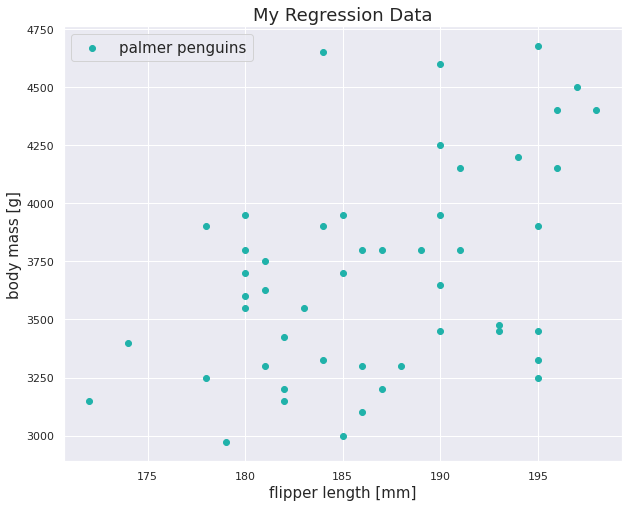

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("./palmer_penguins.csv")
df = df.iloc[:50][["flipper_length_mm", "body_mass_g"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.flipper_length_mm, 
            df.body_mass_g, 
            color = "lightseagreen",
            label = "palmer penguins")
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("body mass [g]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

---

## 4.2.2 Linear Regression Single Neuron Model

As discussed in a [previous lecture](https://www.youtube.com/watch?v=SmEKxsd_67w&t=1s) there exists a general machine learning model for supervised learning. In this model the optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ assigns the correct labels to every possible feature measurement. Next recall that our goal is to find a reasonable hypthesis $h:\mathcal{X} \rightarrow \mathcal{Y}$, which approximates the target function $f$. 

---

General ML Model:
---

<p align="center">
    <img src="General_ML_Model.png" width="500">
</p>

---

Because we are assuming the target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is a **linear function of the input features**, and because we know single neuron models are good function approximators, we next build a single neuron model with a *linear-activation* activation function. Furthermore, in this model we choose the *mean-sqaured error* cost function:

$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

With our specific case of linear regression on the setosa iris dataset with a single feature measurment taken from sepal length data, we next construct a single neuron model with a linear activation function and the mean-sqaured error cost function as depicted in the figure below.

---

Single Neuron Linear Regression Model
---

<p align="center">
    <img src="regression_neuron.png" width="500">
</p>

---

## 4.2.3 Minimize the Cost Function $C(w_1, b)$

Before defining a custom ```SingleNeuron``` class, we first need first discuss how to minimize the neurons cost function. More specifically, we wish to solve the following optimization problem:

$$
\min_{w_1, b}C(w_1, b)
$$

Since $C(w_1, b)$ is a differentiable function of both $w_1$ and $b$, we may attempt to solve this minimization problem by applying the gradient descent algorithm:

$$
w_1 \leftarrow w_1 - \alpha \frac{\partial C}{\partial w_1}
$$

$$
b \leftarrow b - \alpha \frac{\partial C}{\partial b}
$$

### - Finding the Partial Derivatives of $C(w_1, b)$ 
In order to implement the gradient descent method we first need to understand how the partial derivatives of $C(w_1, b)$ are calculated over the training data at hand. With this in mind, suppose for now that we are calculating the mean-sqaured error cost function on a *single example* example of data, i.e., $N = 1$. For this single example we observe that the mean-sqaured error cost function becomes: 

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

In the case of a linear activation function, it is important to note that $\hat{y}^{(i)}$ is a very simple function of both $w_1$ and $b$. More specifically, we observe:

$$
\hat{y}^{(i)} = a = z = w_1x^{(i)} + b. 
$$

Thus, we may rewrite our neuron cost function with a single observation:

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(w_1x^{(i)} + b - y^{(i)}\Big)^2. 
$$

With this equation, we can calculate $\partial C/ \partial w_1$ and $\partial C/ \partial b$ easily by applying the [chain rule (click for a quick refresher on the concept)](https://www.youtube.com/watch?v=HaHsqDjWMLU). The resulting partial derivatives with respect to $w_1$ and $b$ shown by the following equations:

1. $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1} = (w_1x^{(i)} + b - y^{(i)})x^{(i)} = (\hat{y}^{(i)} - y^{(i)})x^{(i)}$
2. $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b} = (w_1x^{(i)} + b - y^{(i)}) = (\hat{y}^{(i)} - y^{(i)})$

Understanding the different ways in which we may calculate the partial derivatives of our cost function is essential in applying any *first-order* minimization technique on the cost function $C(w_1, b)$. With what follows we discuss two of the three fundamental methods used to accomplish this goal. 


### - Different Flavors of First-Order Minimization 
When considering a single instance of data, we easily calculated $\frac{\partial C}{\partial w_1}$ and $\frac{\partial C}{\partial b}$ by applying the chain-rule. This notion can now be extended to all data used in training by summing the gradients calculated at entry of data. We will refer to this process as calculating the **full gradient** (or **full partial derivatives**) with respect to the training data: 

1. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1} = \frac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}$
2. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)$

Calculating the full gradient with respect to all training data and applying the gradient descent algorithm is called **batch gradient descent**.

**Flavor 1. Batch Gradient Descent Algorithm:**
1. For each epoch **do**
2. Calculate the full gradient by finding $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$ and $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$.
3. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$
4. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$

Applying batch gradient descent will work. However, *this method can be very slow and use a lot of memory*, especially when the number of training data is very large (possibly millions). More importantly, **batch gradient descent is not necessary to find local minima**. 

The most common way work around for this problem is to update $w_1$ and $b$ by calculating the gradient with respect to one entry of data at a time. This technique is called **stochastic gradient descent** and is one of the primary tools in training deep neural networks and simple single neuron models.  

**Flavor 2. Stochastic Gradient Descent Algorithm:**
1. For each epoch **do**
2. For $i = 1, \dots, N$ **do**
3. Calculate $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$ and $\frac{\partial C(\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)}))}{\partial b}$.
2. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$
3. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b}$

For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the ```train``` method used in the following custom ```SingleNeuron``` class. 
---

In [97]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


---

### - Quick Data Formatting

Now that we have defined our custom ```SingleNeuron``` class, we next prep our data for training. By running the following code in the cell below, note that the first two lines of code convert the setosa sepal length column of data into a ```numpy.ndarray```. 

**CAUTION:** Single entry feature vectors need to be reshaped using the ```reshape(-1, 1)``` method. This is needed because of the dimensions required for vector and matrix multiplications.

The third line converts the setosa sepal width column of data to a ```numpy.ndarray```. 

---

In [98]:
X = df.flipper_length_mm.values
X = X.reshape(-1, 1)
y = df.body_mass_g.values

In [99]:
X = X[~np.isnan(X)]
X = X.reshape(-1, 1)
y = y[~np.isnan(y)]

---

We can double check that we have formated the data correctly by scatter plotting the data again. Run the following code in the cell below. 
---

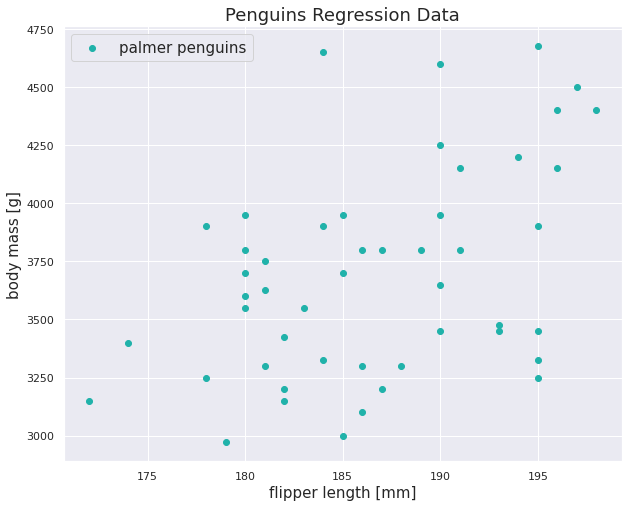

In [100]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "palmer penguins")
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("body mass [g]", fontsize = 15)
plt.title("Penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

---

### - Creating and Training an Instance of the ```SingleNeuron``` Class

In order to instantiate a given instance the```SingleNeuron``` model, we need to first define an activation function. After doing so, we can then instantiate a ```SingleNeuron``` object. After creating this ```SingleNeuron```, we can then train it by calling the ```train()``` method with input ```X``` and ```y```. For demonstration purposes, we also pass the keyword arguments ```alpha = 0.0001``` and ```epochs = 5``` into the ```train()``` method. Do this by running the following code in the cell below. 
---

In [101]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0000001, epochs = 10)

---

Now that we have created an instance of the ```SingleNeuron``` class and called the train method, we can visualize the linear regression line by scatter plotting the data and also ploting the predicted output over some domain within the range of values of input features. Do this by running the following code in the cell below (don't forget that since we are dealing with single measurement features, we must reshape the domain for predicting). 

---

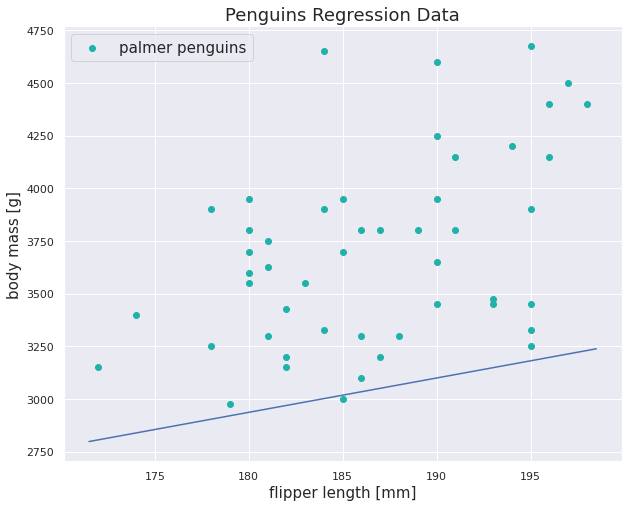

In [102]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "palmer penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("body mass [g]", fontsize = 15)
plt.title("Penguins Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

---

The line generated by our custom ```SingleNeuron``` class surely does not look random! We can verify this by plotting the ```errors_``` attribute that we stored while training. Note that the $i$-th entry of the ```errors_``` attribute is the *mean-sqaured error* of the neuron after the $i+1$ epoch of stochastic gradient descent. If the mean sqaured error is decreasing after each epoch we are on the right track, and our single neuron might be learning! 

We can visualize the mean-sqaured error at each epoch of our training process by running the following code in the cell below. 

---

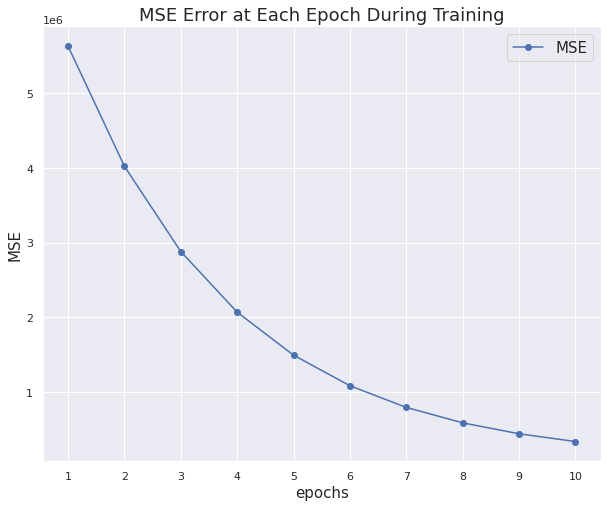

In [103]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

---

### - Visualize your Errors over each Epoch

The mean-sqaured error is decreasing over each epoch! Next lets see what happens when we  training a single neuron over 10 times more epochs than before, while leaving the learning rate unchanged. Try running the following code in the cell below (note the use of the subplots). 
---

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

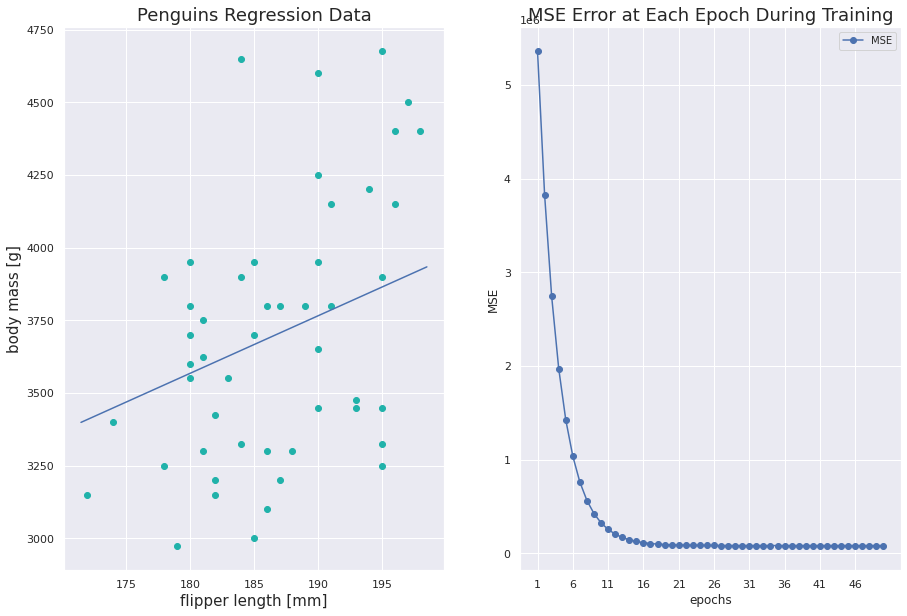

In [104]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0000001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("flipper length [mm]", fontsize = 15)
ax1.set_ylabel("body mass [g]", fontsize = 15)
ax1.set_title("Penguins Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)


---

## 4.2.3 Experiment with the Learning Rate 
As discussed in a previous notebook, the choice of learning rate is a crucial *hyperparamter* when implementing gradient (and stochastic gradient) descent. We can view different choices of learning rate with a fixed number of epochs by running the following code in the cell below.

---

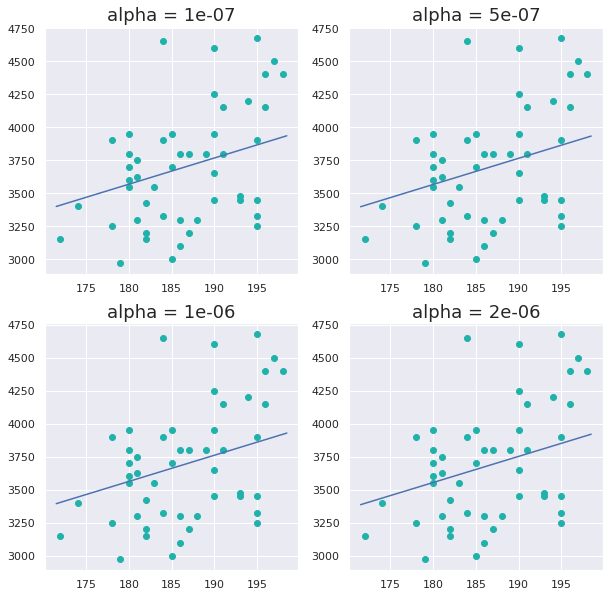

In [105]:
# Possible choices of learning rate 
alphas = [0.0000001, 0.0000005, 0.000001, 0.000002]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)